# Across-Subject Analyses
## Computational Methods in Psychology and Neuroscience
### Psychology 4215/7215 --- Fall 2023
By: Per B. Sederberg, PhD



# Lesson Objectives

Upon completion of this lesson, students should have learned:

1. How to read in multiple data files
2. Perform some simple data clean-up
3. Some more Pandas analysis tricks
4. Regression across subjects


# Loading in all the data

- Let's explore one subject's data and learn stuff along the way!
- Where are the data?

In [15]:
ls flanker_dat

log_flanker_s000.slog  log_flanker_s009.slog  log_flanker_s018.slog
log_flanker_s001.slog  log_flanker_s010.slog  log_flanker_s019.slog
log_flanker_s002.slog  log_flanker_s011.slog  log_flanker_s020.slog
log_flanker_s003.slog  log_flanker_s012.slog  log_flanker_s021.slog
log_flanker_s004.slog  log_flanker_s013.slog  log_flanker_s022.slog
log_flanker_s005.slog  log_flanker_s014.slog  log_flanker_s023.slog
log_flanker_s006.slog  log_flanker_s015.slog  log_flanker_s024.slog
log_flanker_s007.slog  log_flanker_s016.slog
log_flanker_s008.slog  log_flanker_s017.slog


In [13]:
from smile.log import log2dl
import numpy as np
from scipy import stats
import pandas as pd
from glob import glob
import os
import shutil

## Glob?

- Allows for pattern matching for files
- Here we want to return a list of all slogs matching a specific pattern

In [16]:
# note the results are not sorted, but we can sort them after
glob('flanker_dat/log_flanker_s???.slog')

['flanker_dat/log_flanker_s015.slog',
 'flanker_dat/log_flanker_s007.slog',
 'flanker_dat/log_flanker_s024.slog',
 'flanker_dat/log_flanker_s002.slog',
 'flanker_dat/log_flanker_s003.slog',
 'flanker_dat/log_flanker_s010.slog',
 'flanker_dat/log_flanker_s022.slog',
 'flanker_dat/log_flanker_s012.slog',
 'flanker_dat/log_flanker_s008.slog',
 'flanker_dat/log_flanker_s013.slog',
 'flanker_dat/log_flanker_s011.slog',
 'flanker_dat/log_flanker_s021.slog',
 'flanker_dat/log_flanker_s016.slog',
 'flanker_dat/log_flanker_s001.slog',
 'flanker_dat/log_flanker_s019.slog',
 'flanker_dat/log_flanker_s005.slog',
 'flanker_dat/log_flanker_s018.slog',
 'flanker_dat/log_flanker_s014.slog',
 'flanker_dat/log_flanker_s023.slog',
 'flanker_dat/log_flanker_s020.slog',
 'flanker_dat/log_flanker_s000.slog',
 'flanker_dat/log_flanker_s004.slog',
 'flanker_dat/log_flanker_s009.slog',
 'flanker_dat/log_flanker_s017.slog',
 'flanker_dat/log_flanker_s006.slog']

## Manipulating paths with `os.path`

- Different operation systems have different ways of dealing with directories
  - Windows separate directories with `\`
  - Most others use `/`
- Python can handle processing paths for you with the `os.path` module

In [17]:
# split up the path
filepath = 'data/flanker_dat/log_flanker_s002.slog'
os.path.split(filepath)

('data/flanker_dat', 'log_flanker_s002.slog')

In [18]:
# now we need to pull of the file extension
os.path.splitext(os.path.split(filepath)[1])

('log_flanker_s002', '.slog')

In [19]:
# and finally extract the subject id with a standard string split
os.path.splitext(os.path.split(filepath)[1])[0].split('_')[-1]

's002'

## Custom SLOG loading function

In [20]:
# custom function to load slogs
def load_all_subj_logs(data_dir, log_file):
    # load in a list of all the subj
    subjs = [os.path.splitext(os.path.split(filepath)[1])[0].split('_')[-1]
             for filepath in glob(os.path.join(data_dir, log_file + '*.slog'))]
    subjs.sort()

    # loop over subj and their data
    all_dat = []
    for subj in subjs:
        # set the file
        log_path = os.path.join(data_dir, log_file+'_'+subj+'.slog')
        #print(log_path)

        # load the data
        try:
            all_dat.extend(log2dl(log_path, subj=subj))
        except:
            pass

    df = pd.DataFrame(all_dat)
    
    return df

## Load in all the data

In [21]:
# load the data from each task
data_dir = 'flanker_dat'
df = load_all_subj_logs(data_dir, 'log_flanker')
df.head()

,resp_map_left,resp_map_right,block_num,trial_num,stim_on_time,stim_on_error,resp,resp_time_time,resp_time_error,rt,correct,location_0,location_1,log_time,condition,direction,stimulus,subj,log_num
0,F,J,0.0,0.0,249613.254891,0.0,J,249616.094203,0.009599,2.839313,True,785.943662,947.191251,249616.754529,congruent,right,>>>>>>>,s000,0
1,F,J,0.0,1.0,249616.788268,0.0,J,249618.508490,0.000162,1.720221,True,1167.172787,1046.039929,249619.114608,incongruent,right,<<<><<<,s000,0
2,F,J,0.0,2.0,249619.153833,0.0,F,249620.227561,0.009391,1.073728,True,918.107885,998.335457,249621.140820,incongruent,left,>>><>>>,s000,0
3,F,J,0.0,3.0,249621.171137,0.0,F,249624.694328,0.009471,3.523191,True,1351.709251,693.928666,249625.293006,incongruent,left,>>><>>>,s000,0
4,F,J,0.0,4.0,249625.321733,0.0,F,249626.794440,0.009338,1.472707,True,904.081606,995.939834,249627.558606,mix,left,<>><>><,s000,0


## Some data clean-up

In [37]:
# add in log_rt columns
df['log_rt'] = np.log(df['rt'])

# calculate change in x from previous location
df['dx'] = np.concatenate([[np.nan], 
                np.array(df['location_0'][1:]) - 
                np.array(df['location_0'][:-1])])
# must set all first trials to nan
df.loc[df['trial_num']==0, 'dx'] = np.nan

# show the columns
df.columns

Index(['resp_map_left', 'resp_map_right', 'block_num', 'trial_num',
       'stim_on_time', 'stim_on_error', 'resp', 'resp_time_time',
       'resp_time_error', 'rt', 'correct', 'location_0', 'location_1',
       'log_time', 'condition', 'direction', 'stimulus', 'subj', 'log_num',
       'log_rt', 'dx'],
      dtype='object')

## Check Flanker Baseline Performance

- We want to calculate mean performance in the congruent trials and run a binomial test on each participant
- How can we do this efficiently with Pandas?

## Start with a `groupby`

- We know we can group rows of data by subject and apply a function to specific columns

In [44]:
df[df.condition=='congruent'].groupby(['subj'])['correct'].mean()

subj
s000    0.984375
s001     0.96875
s002     0.96875
s003         1.0
s004         1.0
s005         1.0
s006    0.984375
s007         1.0
s008    0.953125
s009    0.984375
s010         1.0
s011         1.0
s012         1.0
s013         1.0
s014         1.0
s015         1.0
s016         1.0
s017         1.0
s018         NaN
s019         1.0
s020         1.0
s021         1.0
s022     0.96875
s023      0.9375
s024     0.96875
Name: correct, dtype: object

In [54]:
df[df.condition=='congruent'].groupby(['subj']).groups['s018']

Index([3457, 3461, 3465, 3466], dtype='int64')

In [55]:
# get rid of that subj with very little data
df = df.loc[df['subj']!='s018']

In [56]:
df.groupby(['subj', 'condition'])['correct'].mean()

subj  condition  
s000  congruent      0.984375
      incongruent    0.984375
      mix             0.96875
s001  congruent       0.96875
      incongruent      0.9375
                       ...   
s023  incongruent    0.984375
      mix            0.984375
s024  congruent       0.96875
      incongruent    0.984375
      mix                 1.0
Name: correct, Length: 72, dtype: object

## The `agg` method can help

- `agg` allows us to run more than one function on each group
- Can provide either a string or the actual function
- We need the `sum` and the `count` for the binomial test

In [57]:
mperf = df[df.condition=='congruent'].groupby(['subj'])['correct'].agg(['sum', 'count', 'mean'])
mperf.tail(10)

,sum,count,mean
subj,,,
s014,64,64,1.0
s015,64,64,1.0
s016,64,64,1.0
s017,64,64,1.0
s019,64,64,1.0
s020,64,64,1.0
s021,64,64,1.0
s022,62,64,0.96875
s023,60,64,0.9375


## Use `apply` to run a function on each row

- The `apply` method of a `DataFrame` allows you to...
- Here we need to specify a custom function that uses the info from each row to call `stats.binom_test`
  - We could have defined a separate function
  - But here I'll use `lambda` to define a function inline, since it's only one line of code

In [58]:
def run_binom_test(x):
    return stats.binomtest(x['sum'], n=x['count'], 
                           p=0.5, alternative='greater'),

In [60]:
# add the binom_test p value as a new column (axis=1 tells it to go by row)
mperf['binom_pval'] = mperf.apply(lambda x: stats.binomtest(x['sum'], n=x['count'], 
                                                            p=0.5, 
                                                            alternative='greater').pvalue,
                                  axis=1)

# they are good if the mean is greater than 0.5 and the pval is less that .05
mperf['good'] = (mperf['mean']>0.5) & (mperf['binom_pval'] <= 0.05)
mperf

,sum,count,mean,binom_pval,good
subj,,,,,
s000,63,64,0.984375,3.523657e-18,True
s001,62,64,0.96875,1.128112e-16,True
s002,62,64,0.96875,1.128112e-16,True
s003,64,64,1.0,5.421011e-20,True
s004,64,64,1.0,5.421011e-20,True
s005,64,64,1.0,5.421011e-20,True
s006,63,64,0.984375,3.523657e-18,True
s007,64,64,1.0,5.421011e-20,True
s008,61,64,0.953125,2.371421e-15,True


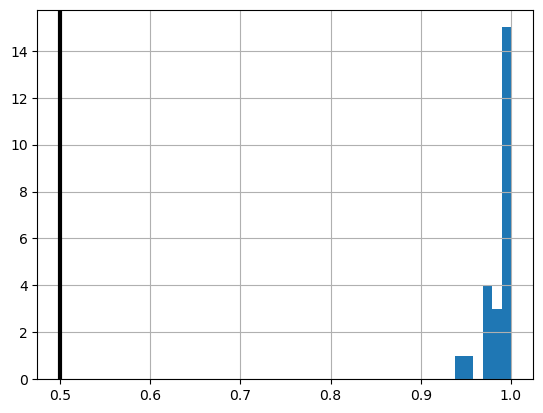

In [61]:
# quick plot of performance
ax = mperf['mean'].hist(bins='auto')
ax.axvline(0.5, color='k', lw=3)

## What about performance on all flanker conditions?

- Another way to test for task compliance is to check the performance on the easiest task conditions.
- ***Question: Did the participant perform above chance on all flanker conditions trials?***

<Axes: title={'center': 'log_rt'}, xlabel='[subj]'>

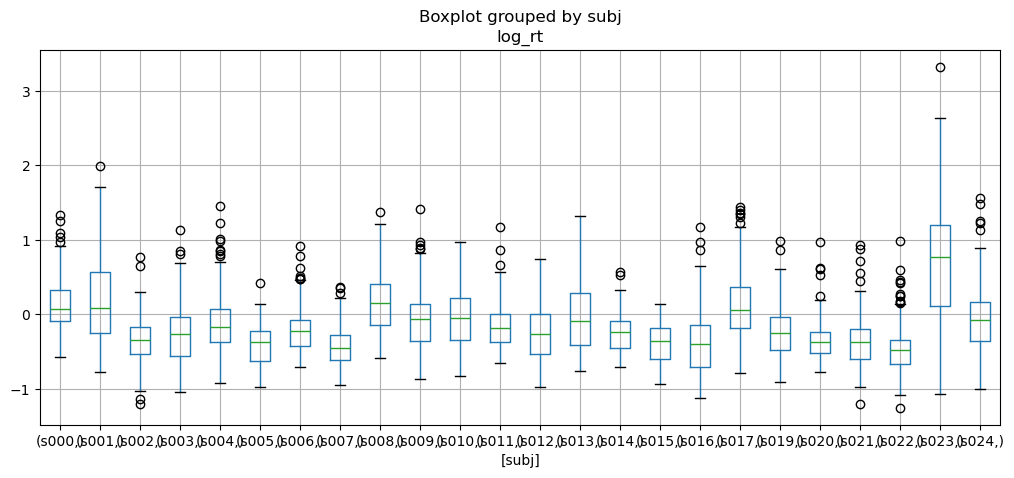

In [62]:
df.boxplot(column=['log_rt'], by=['subj'], figsize=(12,5))

In [63]:
fperf = df.groupby(['subj', 'condition'])['correct'].agg(['sum', 'count', 'mean'])
fperf['binom_pval'] = fperf.apply(lambda x: stats.binomtest(x['sum'], n=x['count'], 
                                                             p=0.5, 
                                                            alternative='two-sided').pvalue,
                                  axis=1)
fperf

sum  count      mean    binom_pval
subj condition                                     
s000 congruent    63     64  0.984375  7.047314e-18
     incongruent  63     64  0.984375  7.047314e-18
     mix          62     64   0.96875  2.256225e-16
s001 congruent    62     64   0.96875  2.256225e-16
     incongruent  60     64    0.9375  7.363045e-14
...               ..    ...       ...           ...
s023 incongruent  63     64  0.984375  7.047314e-18
     mix          63     64  0.984375  7.047314e-18
s024 congruent    62     64   0.96875  2.256225e-16
     incongruent  63     64  0.984375  7.047314e-18
     mix          64     64       1.0  1.084202e-19

[72 rows x 4 columns]

## Congruency effect

- The typical congruency effect is that participants show lower accuracy and slower reaction times in the incongruent relative to the congruent conditions
- Let's check that for all our participants!

### Performance by condition

Text(0.5, 0, 'Condition')

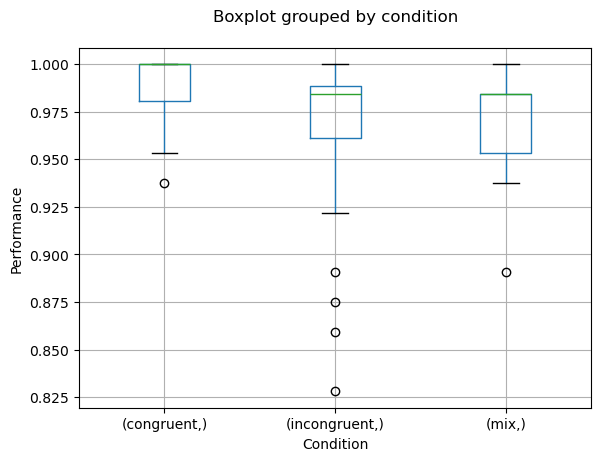

In [64]:
# Let's make a boxplot of the performance values
ax = fperf.boxplot(column='mean', by=['condition'])
ax.set_title('')
ax.set_ylabel('Performance')
ax.set_xlabel('Condition')

### RT by condition

Text(0.5, 0, 'Condition')

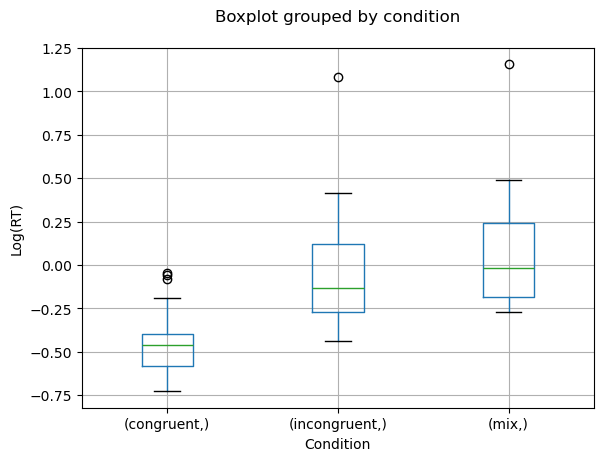

In [65]:
fres = df.groupby(['subj', 'condition'])['log_rt'].mean().reset_index()
ax = fres.boxplot(column='log_rt', by=['condition'])
ax.set_title('')
ax.set_ylabel('Log(RT)')
ax.set_xlabel('Condition')

## Error bars for repeated measures designs

- The box plots above do not actually show us the relationships between the conditions that indicate significance
- We have a repeated-measures design, with different conditions *within* subjects
- Thus, the real comparisons of interest are *within* subjects, not *between* subjects
  - In the box plots, the between-subject variability is masking the within-subject effects!
- To help us visualize the differences more-accurately, we can calculate within-subject corrected error bars
  - All this entails is removing the within-subject mean across conditions before calculating error

In [66]:
# some folks wrote a useful script for calculating these for us!
from ci_within import ci_within

In [67]:
# get the error corrected by condition and whether they got it correct
res = ci_within(df, indexvar='subj', 
                withinvars=['condition', 'correct'], 
                measvar='log_rt')
res

/home/per/OneDrive/class/compsy/lessons/ci_within.py:58: FutureWarning: The provided callable <function mean at 0x7f80040a7130> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  out = df.groupby(withinvars)[measvar].agg(aggfuncs)
/home/per/OneDrive/class/compsy/lessons/ci_within.py:58: FutureWarning: The provided callable <function std at 0x7f80040a7250> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  out = df.groupby(withinvars)[measvar].agg(aggfuncs)


mean       std       sem        ci   len
condition   correct                                              
congruent   False   -0.621069  0.273446  0.064452  0.135982    18
            True    -0.449100  0.309789  0.007951  0.015596  1518
incongruent False   -0.284880  0.664926  0.087309  0.174833    58
            True    -0.022914  0.339846  0.008840  0.017340  1478
mix         False   -0.046418  0.657393  0.101438  0.204858    42
            True     0.063450  0.363175  0.009396  0.018431  1494

## Unstacking and Resetting Index

- After a group-by, we often need to pivot the data so that it has the right indices for plotting
- The `unstack` command takes a multi-level index and moves one of the row indices to a column
- Here we'll move the `correct` row indicator to be a column indicator
- Calling `reset_index` will fill in the values in all the index columns and add in an overall index.

In [68]:
# must unstack and reset index to plot properly
res.unstack().reset_index()

condition      mean                 std                 sem  \
correct                  False      True     False      True     False   
0          congruent -0.621069 -0.449100  0.273446  0.309789  0.064452   
1        incongruent -0.284880 -0.022914  0.664926  0.339846  0.087309   
2                mix -0.046418  0.063450  0.657393  0.363175  0.101438   

                         ci             len        
correct      True     False      True False  True  
0        0.007951  0.135982  0.015596    18  1518  
1        0.008840  0.174833  0.017340    58  1478  
2        0.009396  0.204858  0.018431    42  1494

Text(0, 0.5, 'Log(RT)')

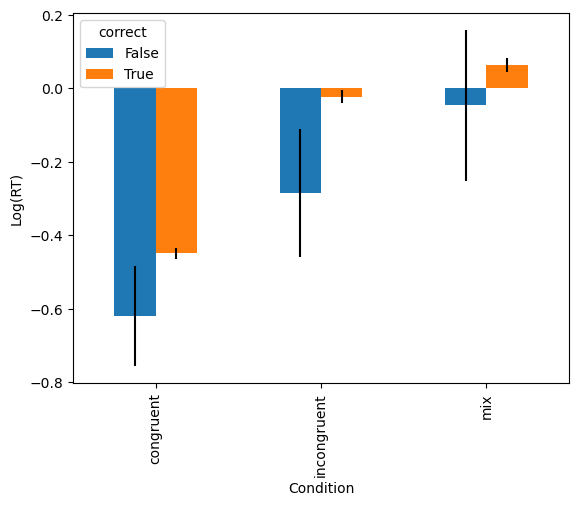

In [69]:
# plot the results
ax = res.unstack().reset_index().plot(x='condition', y='mean', yerr='ci', kind="bar")
#ax.get_legend().remove()
ax.set_xlabel('Condition')
ax.set_ylabel('Log(RT)')

/home/per/OneDrive/class/compsy/lessons/ci_within.py:58: FutureWarning: The provided callable <function mean at 0x7f80040a7130> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  out = df.groupby(withinvars)[measvar].agg(aggfuncs)
/home/per/OneDrive/class/compsy/lessons/ci_within.py:58: FutureWarning: The provided callable <function std at 0x7f80040a7250> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  out = df.groupby(withinvars)[measvar].agg(aggfuncs)


<Axes: xlabel='condition'>

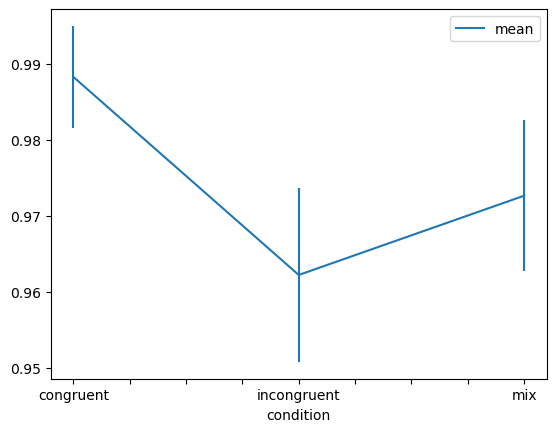

In [70]:
# get the error corrected by condition and whether they got it correct
res = ci_within(df, indexvar='subj', 
                withinvars=['condition'], 
                measvar='correct')
res.reset_index().plot(x='condition', y='mean', yerr='ci', kind="line")

## Regression and beyond!

- This sure looks significant, but we need to build a regression to test all these factors

![](https://scipy-lectures.org/_images/math/8c27948834377cd91a6907f91d1f87acb32f1817.png)

- Here `y` is the dependent variable and `x` is the independent variable(s).
- This is also often called *endogenous* and *exogenous*.

## Statsmodels allows us to specify regressions as formulas

- There are many ways to fit regression models that often depend on your dependent data
  - e.g., ordinary least squares vs. logistic regression

In [71]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Question: Are there differences in accuracy between conditions?

In [96]:
# first we need to get summary values for each subj
sum_df = df.groupby(['subj', 'condition'])['correct'].mean().reset_index()

# for some reason the dtype was coming back as an object
sum_df.correct = sum_df.correct.astype(np.float64)
sum_df

,subj,condition,correct
0,s000,congruent,0.984375
1,s000,incongruent,0.984375
2,s000,mix,0.968750
3,s001,congruent,0.968750
4,s001,incongruent,0.937500
...,...,...,...
67,s023,incongruent,0.984375
68,s023,mix,0.984375
69,s024,congruent,0.968750
70,s024,incongruent,0.984375


In [97]:
# build a least squares regression
model = smf.ols("correct ~ condition", sum_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                correct   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     3.544
Date:                Thu, 12 Oct 2023   Prob (F-statistic):             0.0343
Time:                        09:43:26   Log-Likelihood:                 142.60
No. Observations:                  72   AIC:                            -279.2
Df Residuals:                      69   BIC:                            -272.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.9883      0.007    141.939      0.000       0.974       1.002
condition[T.incongruent]    -0.0260      0.010     -2.645      0.010      -0.046      -0.006
condition[T.mix]            -0.0156      0.010     -1.587      0.117      -0.035       0.004
==============================================================================
Omnibus:                       37.431   Durbin-Watson:                   1.383
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.011
Skew:                          -1.833   Prob(JB):                     2.56e-18
Kurtosis:                       6.683   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
model.f_test("condition[T.incongruent]=condition[T.mix]")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.119107957425145, p=0.29380017352727156, df_denom=69, df_num=1>

### Question: Are there differences in RTs between conditions?

In [99]:
# first we need to get summary values for each subj
sum_df = df.groupby(['subj', 'condition', 'correct'])['log_rt'].mean().reset_index()
sum_df

,subj,condition,correct,log_rt
0,s000,congruent,False,-0.019019
1,s000,congruent,True,-0.082375
2,s000,incongruent,False,0.635847
3,s000,incongruent,True,0.162179
4,s000,mix,False,0.242996
...,...,...,...,...
113,s024,congruent,False,-0.482125
114,s024,congruent,True,-0.441140
115,s024,incongruent,False,-0.329127
116,s024,incongruent,True,0.120897


#### Full model with interaction

log_rt ~ condition + correct + condition*correct + intercept + noise

In [100]:
# build a linear regression of the full model
m0 = smf.ols("log_rt ~ condition * correct", sum_df).fit()
m0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_rt   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     4.085
Date:                Thu, 12 Oct 2023   Prob (F-statistic):            0.00192
Time:                        09:44:22   Log-Likelihood:                -71.764
No. Observations:                 118   AIC:                             155.5
Df Residuals:                     112   BIC:                             172.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -0.4119      0.152     -2.708      0.008      -0.713      -0.111
condition[T.incongruent]                     0.2282      0.186      1.225      0.223      -0.141       0.597
condition[T.mix]                             0.2209      0.185      1.196      0.234      -0.145       0.587
correct[T.True]                             -0.0385      0.178     -0.216      0.829      -0.392       0.315
condition[T.incongruent]:correct[T.True]     0.1994      0.228      0.874      0.384      -0.253       0.651
condition[T.mix]:correct[T.True]             0.2930      0.227      1.292      0.199      -0.156       0.742
==============================================================================
Omnibus:                       37.136   Durbin-Watson:                   1.245
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.922
Skew:                           1.302   Prob(JB):                     3.26e-17
Kurtosis:                       5.943   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [101]:
sm.stats.anova_lm(m0, typ=2)

,sum_sq,df,F,PR(>F)
condition,3.650120,2.0,8.766737,0.000290
correct,0.613172,1.0,2.945394,0.088887
condition:correct,0.349594,2.0,0.839644,0.434564
Residual,23.316169,112.0,NaN,NaN


#### Model with only correct items

In [102]:
sum_df = df.loc[df['correct']].groupby(['subj', 'condition'])['log_rt'].mean().reset_index()
sum_df

,subj,condition,log_rt
0,s000,congruent,-0.082375
1,s000,incongruent,0.162179
2,s000,mix,0.289561
3,s001,congruent,-0.267958
4,s001,incongruent,0.350148
...,...,...,...
67,s023,incongruent,1.075740
68,s023,mix,1.192626
69,s024,congruent,-0.441140
70,s024,incongruent,0.120897


In [103]:
m2 = smf.ols("log_rt ~ condition", sum_df).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_rt   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     22.64
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           2.76e-08
Time:                        09:44:53   Log-Likelihood:                -9.8317
No. Observations:                  72   AIC:                             25.66
Df Residuals:                      69   BIC:                             32.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.4504      0.058     -7.788      0.000      -0.566      -0.335
condition[T.incongruent]     0.4276      0.082      5.228      0.000       0.264       0.591
condition[T.mix]             0.5139      0.082      6.282      0.000       0.351       0.677
==============================================================================
Omnibus:                       39.808   Durbin-Watson:                   0.715
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.871
Skew:                           1.790   Prob(JB):                     2.29e-24
Kurtosis:                       7.845   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
model.f_test("condition[T.incongruent]=condition[T.mix]")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.119107957425145, p=0.29380017352727156, df_denom=69, df_num=1>

## Conclusion

- We see a robust congruency effect whereby:
  - Incongruent/Mixed trials have lower performance than congruent
  - *Correct* incongruent/mixed trials are much slower than *incorrect*
  - i.e., participants make "fast" errors

## Assignment before next class

- We will some post recognition tasks to run based on the tasks developed for class
- This will be due on ***Tuesday*** next week so we have time to compile the data

### See you next week!!!